In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Problem 1

In [3]:
def onChangeCallback(x):
    pass

cv2.namedWindow('input')
cv2.moveWindow('input', 0, 20)

cv2.namedWindow('trackbars')
cv2.moveWindow('trackbars', 1000, 20)

cv2.namedWindow('mask')
cv2.moveWindow('mask', 500, 20)

cv2.namedWindow('output')
cv2.moveWindow('output', 500, 20)

cv2.createTrackbar('min H', 'trackbars', 0, 255, onChangeCallback)
cv2.createTrackbar('max H', 'trackbars', 0, 255, onChangeCallback)
cv2.createTrackbar('min S', 'trackbars', 0, 255, onChangeCallback)
cv2.createTrackbar('max S', 'trackbars', 0, 255, onChangeCallback)
cv2.createTrackbar('min V', 'trackbars', 0, 255, onChangeCallback)
cv2.createTrackbar('max V', 'trackbars', 0, 255, onChangeCallback)

input = cv2.imread('rgb.png', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(input, cv2.COLOR_BGR2HSV)

while True:
    hMin = cv2.getTrackbarPos('min H', 'trackbars')
    hMax = cv2.getTrackbarPos('max H', 'trackbars')
    sMin = cv2.getTrackbarPos('min S', 'trackbars')
    sMax = cv2.getTrackbarPos('max S', 'trackbars')
    vMin = cv2.getTrackbarPos('min V', 'trackbars')
    vMax = cv2.getTrackbarPos('max V', 'trackbars')

    lowerBoundaries = np.array([hMin, sMin, vMin])
    upperBoundaries = np.array([hMax, sMax, vMax])

    mask = cv2.inRange(hsv, lowerBoundaries, upperBoundaries)    
   
    output = cv2.bitwise_and(input, input, mask = mask)

    cv2.imshow('input', input)
    cv2.imshow('mask', mask)
    cv2.imshow('output', output)

    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        
        break

cv2.destroyAllWindows()

Problem 2

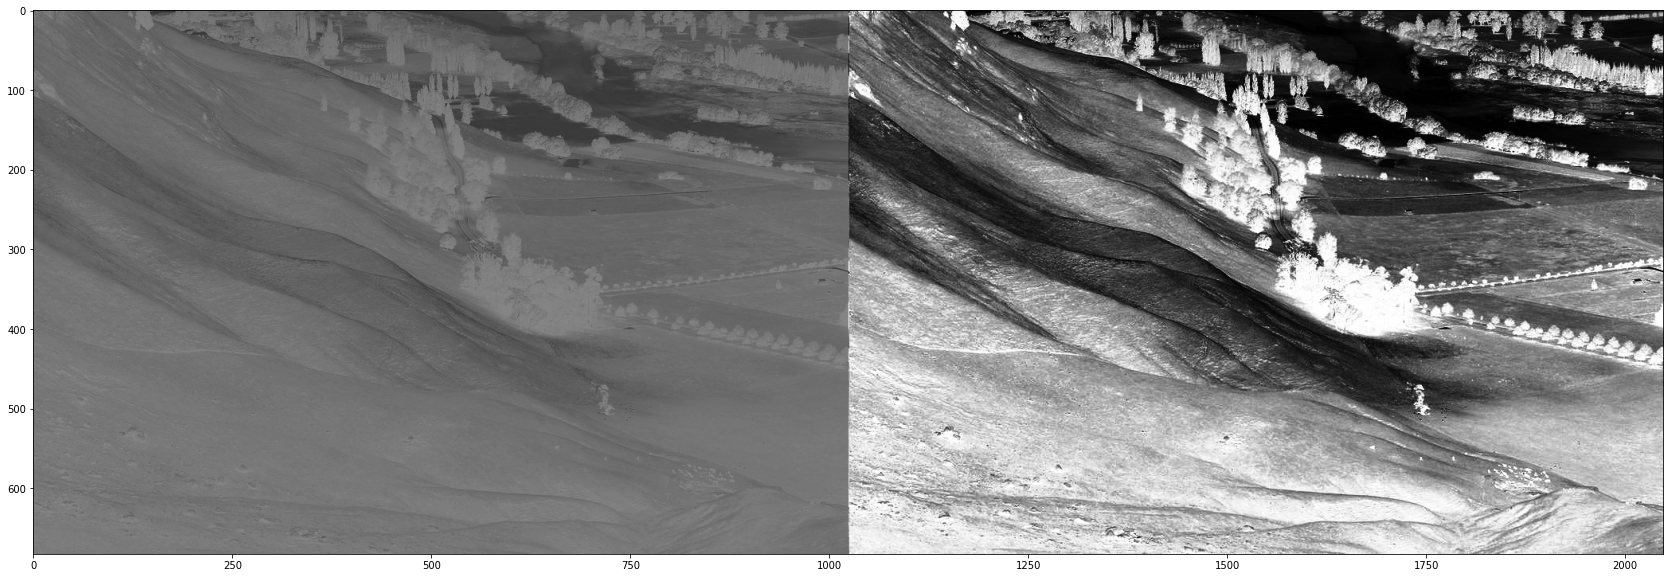

In [6]:
input = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)
input_equalized = cv2.imread('gray_equalized.jpg', cv2.IMREAD_GRAYSCALE)
output = 255 - input
output_equalized = 255 - input_equalized

plt.figure(figsize = (40, 10))
plt.imshow(np.concatenate((output, output_equalized), axis = 1), 'gray')

Problem 3

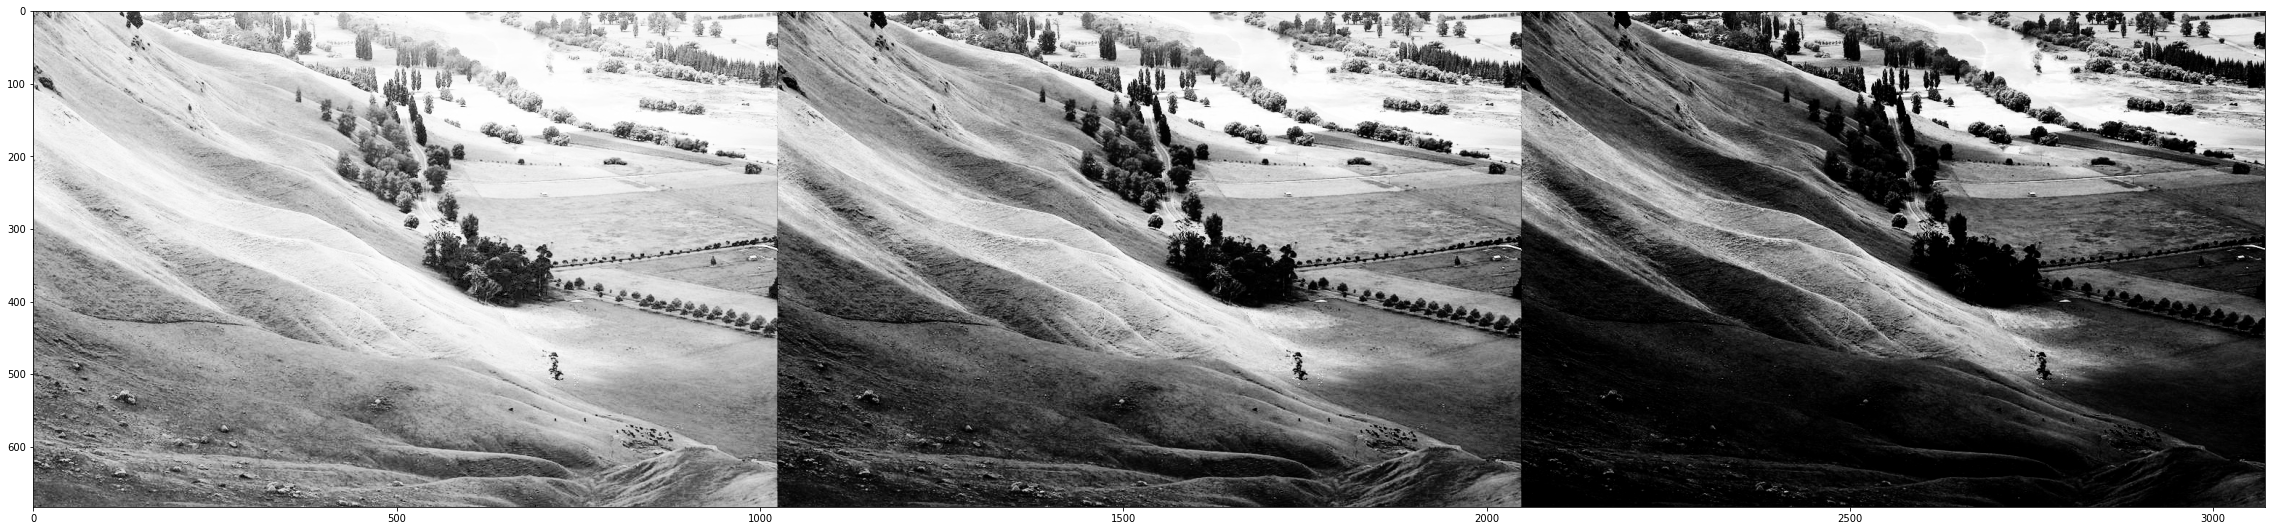

In [22]:
gamma_1 = 0.4
gamma_2 = 2.5
C = 255.0

input = cv2.imread('gray_equalized.jpg', cv2.IMREAD_GRAYSCALE)

output_1 = (C * np.power(input / 255.0, gamma_1)).astype(np.uint8)
output_2 = (C * np.power(input / 255.0, gamma_2)).astype(np.uint8)

plt.figure(figsize = (40, 10))
plt.imshow(np.concatenate((output_1, input, output_2), axis = 1), 'gray')
